# KC PawsAbilities Instagram Analysis 

***Chasity Castro*** 

## Project Scope 

1. How many IG posts total?
2. How many posts are photos vs. videos?
3. How do likes on posts fluctuate over time?
4. What are the average number of likes on photos? On videos? 
5. Which are the top liked posts on IG? 
6. Which are the least liked posts on IG?
7. Are there any correlations with higher liked posts?

### Import & Clean Dataset 

In [3]:
#import packages 

import csv
import pandas as pd
import numpy as np

import collections
from collections import Counter 

import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

import os
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [4]:
#import dataset 

df=pd.read_csv("KC_Pawsabilities .csv")
df.head()

,ID,date,posttype,likes,views,comments,words,characters,number of posts,number of IG tags,number of product tags,number of hashtags,royals post,chiefs post,employee post,funny post,promotion
0,272,9/15/2020,0,63,NaN,1,30,175,3,2,1,8,0.0,1.0,1,0,NaN
1,271,9/9/2020,0,58,NaN,1,58,302,4,2,1,17,0.0,1.0,0,0,NaN
2,270,9/2/2020,0,45,NaN,1,39,220,1,0,1,15,0.0,1.0,0,0,NaN
3,269,8/26/2020,0,39,NaN,1,40,220,4,0,1,16,1.0,1.0,0,0,NaN
4,268,8/11/2020,0,61,NaN,3,6,44,2,0,2,14,0.0,0.0,0,1,NaN


In [5]:
#replace incorrect values

df = df.replace({'year': 2028}, {'year': 2018})
df.head()

,ID,date,posttype,likes,views,comments,words,characters,number of posts,number of IG tags,number of product tags,number of hashtags,royals post,chiefs post,employee post,funny post,promotion
0,272,9/15/2020,0,63,NaN,1,30,175,3,2,1,8,0.0,1.0,1,0,NaN
1,271,9/9/2020,0,58,NaN,1,58,302,4,2,1,17,0.0,1.0,0,0,NaN
2,270,9/2/2020,0,45,NaN,1,39,220,1,0,1,15,0.0,1.0,0,0,NaN
3,269,8/26/2020,0,39,NaN,1,40,220,4,0,1,16,1.0,1.0,0,0,NaN
4,268,8/11/2020,0,61,NaN,3,6,44,2,0,2,14,0.0,0.0,0,1,NaN


In [6]:
#replace incorrect values 

df = df.replace({'likes ': 476}, {'likes ': 47})
df.head()

,ID,date,posttype,likes,views,comments,words,characters,number of posts,number of IG tags,number of product tags,number of hashtags,royals post,chiefs post,employee post,funny post,promotion
0,272,9/15/2020,0,63,NaN,1,30,175,3,2,1,8,0.0,1.0,1,0,NaN
1,271,9/9/2020,0,58,NaN,1,58,302,4,2,1,17,0.0,1.0,0,0,NaN
2,270,9/2/2020,0,45,NaN,1,39,220,1,0,1,15,0.0,1.0,0,0,NaN
3,269,8/26/2020,0,39,NaN,1,40,220,4,0,1,16,1.0,1.0,0,0,NaN
4,268,8/11/2020,0,61,NaN,3,6,44,2,0,2,14,0.0,0.0,0,1,NaN


In [7]:
#fill nan values in views column 

df['views '] = df['views '].fillna(0)
df.head()

,ID,date,posttype,likes,views,comments,words,characters,number of posts,number of IG tags,number of product tags,number of hashtags,royals post,chiefs post,employee post,funny post,promotion
0,272,9/15/2020,0,63,0.0,1,30,175,3,2,1,8,0.0,1.0,1,0,NaN
1,271,9/9/2020,0,58,0.0,1,58,302,4,2,1,17,0.0,1.0,0,0,NaN
2,270,9/2/2020,0,45,0.0,1,39,220,1,0,1,15,0.0,1.0,0,0,NaN
3,269,8/26/2020,0,39,0.0,1,40,220,4,0,1,16,1.0,1.0,0,0,NaN
4,268,8/11/2020,0,61,0.0,3,6,44,2,0,2,14,0.0,0.0,0,1,NaN


In [8]:
#fill nan values in promotion column 

df['promotion'] = df['promotion'].fillna(0)
df.head()

,ID,date,posttype,likes,views,comments,words,characters,number of posts,number of IG tags,number of product tags,number of hashtags,royals post,chiefs post,employee post,funny post,promotion
0,272,9/15/2020,0,63,0.0,1,30,175,3,2,1,8,0.0,1.0,1,0,0.0
1,271,9/9/2020,0,58,0.0,1,58,302,4,2,1,17,0.0,1.0,0,0,0.0
2,270,9/2/2020,0,45,0.0,1,39,220,1,0,1,15,0.0,1.0,0,0,0.0
3,269,8/26/2020,0,39,0.0,1,40,220,4,0,1,16,1.0,1.0,0,0,0.0
4,268,8/11/2020,0,61,0.0,3,6,44,2,0,2,14,0.0,0.0,0,1,0.0


In [9]:
#create dataframe with only information regarding photo posts 

df1=pd.read_csv("KC_Pawsabilities .csv")

df1.drop(df1.index[df1['posttype'] == 0], inplace = False)
df1.head()

,ID,date,posttype,likes,views,comments,words,characters,number of posts,number of IG tags,number of product tags,number of hashtags,royals post,chiefs post,employee post,funny post,promotion
0,272,9/15/2020,0,63,NaN,1,30,175,3,2,1,8,0.0,1.0,1,0,NaN
1,271,9/9/2020,0,58,NaN,1,58,302,4,2,1,17,0.0,1.0,0,0,NaN
2,270,9/2/2020,0,45,NaN,1,39,220,1,0,1,15,0.0,1.0,0,0,NaN
3,269,8/26/2020,0,39,NaN,1,40,220,4,0,1,16,1.0,1.0,0,0,NaN
4,268,8/11/2020,0,61,NaN,3,6,44,2,0,2,14,0.0,0.0,0,1,NaN


In [10]:
#create dataframe with only information regarding video posts 

df2=pd.read_csv("KC_Pawsabilities .csv")

df2.drop(df2.index[df2['posttype'] == 0], inplace = True)
df2.head()

,ID,date,posttype,likes,views,comments,words,characters,number of posts,number of IG tags,number of product tags,number of hashtags,royals post,chiefs post,employee post,funny post,promotion
32,239,3/23/2020,1,37,1130.0,40,93,520,1,0,0,0,0.0,0.0,0,0,1.0
40,231,2/26/2020,1,24,118.0,0,1,14,1,0,0,0,0.0,0.0,0,0,NaN
43,228,2/21/2020,1,80,371.0,1,5,27,1,0,0,14,0.0,0.0,1,0,NaN
44,227,2/19/2020,1,75,25.0,3,8,49,1,0,0,0,0.0,0.0,1,0,NaN
57,214,12/24/2019,1,42,138.0,1,17,167,0,0,0,12,0.0,0.0,1,0,NaN


In [11]:
#add column 'year' 

df['year'] = pd.DatetimeIndex(df['date']).year
df.head()

,ID,date,posttype,likes,views,comments,words,characters,number of posts,number of IG tags,number of product tags,number of hashtags,royals post,chiefs post,employee post,funny post,promotion,year
0,272,9/15/2020,0,63,0.0,1,30,175,3,2,1,8,0.0,1.0,1,0,0.0,2020
1,271,9/9/2020,0,58,0.0,1,58,302,4,2,1,17,0.0,1.0,0,0,0.0,2020
2,270,9/2/2020,0,45,0.0,1,39,220,1,0,1,15,0.0,1.0,0,0,0.0,2020
3,269,8/26/2020,0,39,0.0,1,40,220,4,0,1,16,1.0,1.0,0,0,0.0,2020
4,268,8/11/2020,0,61,0.0,3,6,44,2,0,2,14,0.0,0.0,0,1,0.0,2020


In [12]:
#add column 'month'

df['month'] = pd.DatetimeIndex(df['date']).month
df.head()

,ID,date,posttype,likes,views,comments,words,characters,number of posts,number of IG tags,number of product tags,number of hashtags,royals post,chiefs post,employee post,funny post,promotion,year,month
0,272,9/15/2020,0,63,0.0,1,30,175,3,2,1,8,0.0,1.0,1,0,0.0,2020,9
1,271,9/9/2020,0,58,0.0,1,58,302,4,2,1,17,0.0,1.0,0,0,0.0,2020,9
2,270,9/2/2020,0,45,0.0,1,39,220,1,0,1,15,0.0,1.0,0,0,0.0,2020,9
3,269,8/26/2020,0,39,0.0,1,40,220,4,0,1,16,1.0,1.0,0,0,0.0,2020,8
4,268,8/11/2020,0,61,0.0,3,6,44,2,0,2,14,0.0,0.0,0,1,0.0,2020,8


In [13]:
#add column month year 

df['month_year'] = pd.to_datetime(df['date']).dt.to_period('M')
df.head()

,ID,date,posttype,likes,views,comments,words,characters,number of posts,number of IG tags,number of product tags,number of hashtags,royals post,chiefs post,employee post,funny post,promotion,year,month,month_year
0,272,9/15/2020,0,63,0.0,1,30,175,3,2,1,8,0.0,1.0,1,0,0.0,2020,9,2020-09
1,271,9/9/2020,0,58,0.0,1,58,302,4,2,1,17,0.0,1.0,0,0,0.0,2020,9,2020-09
2,270,9/2/2020,0,45,0.0,1,39,220,1,0,1,15,0.0,1.0,0,0,0.0,2020,9,2020-09
3,269,8/26/2020,0,39,0.0,1,40,220,4,0,1,16,1.0,1.0,0,0,0.0,2020,8,2020-08
4,268,8/11/2020,0,61,0.0,3,6,44,2,0,2,14,0.0,0.0,0,1,0.0,2020,8,2020-08


### Descriptive Statistics 

#### Photo & Video Statistics 

In [14]:
#basic descriptive statistics 

df.describe()

,ID,posttype,likes,views,comments,words,characters,number of posts,number of IG tags,number of product tags,number of hashtags,royals post,chiefs post,employee post,funny post,promotion,year,month
count,269.000000,269.000000,269.000000,269.00000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,219.000000,268.000000,269.000000,269.000000,269.000000,269.00000,269.000000
mean,135.628253,0.133829,34.501859,9.27881,1.081784,27.802974,162.862454,1.806691,0.486989,0.208178,6.669145,0.059361,0.100746,0.193309,0.197026,0.014870,2018.72119,5.728625
std,79.098107,0.341103,21.567254,74.44782,2.689255,14.243951,85.875863,2.889732,1.157720,0.497539,6.342099,0.621585,0.301556,0.395629,0.398494,0.121258,1.05110,3.440968
min,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.00000,1.000000
25%,67.000000,0.000000,17.000000,0.00000,0.000000,18.000000,108.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.00000,3.000000
50%,135.000000,0.000000,31.000000,0.00000,1.000000,27.000000,153.000000,1.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.00000,5.000000
75%,204.000000,0.000000,49.000000,0.00000,1.000000,35.000000,201.000000,2.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.00000,8.000000
max,272.000000,1.000000,139.000000,1130.00000,40.000000,93.000000,520.000000,45.000000,10.000000,3.000000,30.000000,9.000000,1.000000,1.000000,1.000000,1.000000,2028.00000,12.000000


In [15]:
#average number of likes (includes both photos and videos)

df["likes "].mean()

34.50185873605948

In [16]:
#average number of hashtags (includes both photos and videos)

df["number of hashtags "].mean()

6.669144981412639

In [17]:
#average number of comments (includes both photos and videos)

df["comments"].mean()

1.0817843866171004

#### Photo Statistics 

In [18]:
#average number of likes (photos)

df1["likes "].mean()

36.09665427509294

In [19]:
#average number of comments (photos)

df1["comments"].mean()

1.0817843866171004

#### Video Statistics 

In [21]:
#average number of likes (videos)

df2["likes "].mean()

22.833333333333332

In [22]:
#average number of views (videos)

df2["views "].mean()

104.0

In [23]:
#average number of comments (videos)

df2["comments"].mean()

1.5

### Types of Posts (Photos vs. Videos) 

In [23]:
#number of photo posts vs. video posts 

df.groupby('posttype').size()

posttype
0    233
1     36
dtype: int64

***Total Number of Posts: 269*** 

***Number of Photos: 233***

***Number of Videos: 36*** 

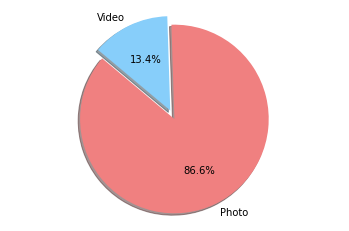

In [24]:
#pie chart displaying the number of photo posts vs. video posts 

labels = 'Photo', 'Video'
sizes = [233, 36]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

***Photo Percentage: 86.6%*** 

***Video Percentage: 13.4%*** 

### Number of Likes Over Time 

In [257]:
#number of posts per year 

df.groupby('year ').size()

year
2017     18
2018    107
2019     86
2020     58
dtype: int64

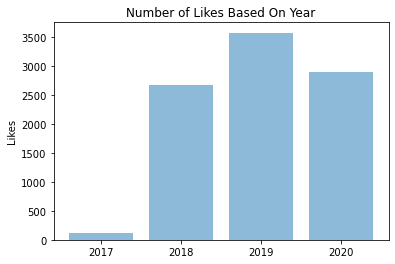

In [30]:
#bar chart displaying number of likes based on year 

objects = ('2017', '2018', '2019', '2020')
y_pos = np.arange(len(objects))
performance = [122,2673,3579,2907]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Likes')
plt.title('Number of Likes Based On Year')

plt.show()

***The highest numnber of likes were recieved in 2019. It seems that KC PawsAbilities has been increasing likes per post over time. We see that the number of likes for 2019 is higher than that of 2018 even though there were more posts made in 2018. Similarly, we see that the number of likes for 2020 is nearing the number for 2019 with still two months left in the year to create posts and receive more likes*** 


***Suggestion: Increase the number of posts at the end of this year to surpass the number of likes received last year.*** 

In [260]:
#number of post per month 

df.groupby('month').size()

month
1     24
2     31
3     37
4     24
5     22
6     36
7     18
8     14
9     12
10    12
11    12
12    27
dtype: int64

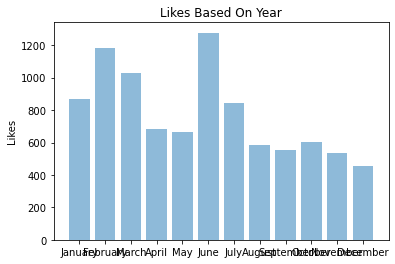

In [34]:
#number of likes based on month 

objects = ('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December')
y_pos = np.arange(len(objects))
performance = [871,1183,1029,686,665,1277,841,582,552,601,536,454]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Likes')
plt.title('Likes Based On Year')

plt.show()

***The highest number of likes are typically received in the months of February, March, and June.  June, February, and December. You may notice that these months are the months that contain the highest number of posts.*** 

***Suggestion: Increase the number of posts from August to November. During these months there are significantly less posts and likes.*** 

## Views Over Time 

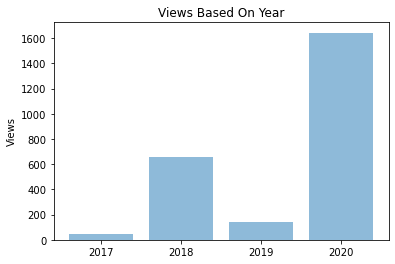

In [35]:
#number of views based on month_year posted 

objects = ('2017', '2018', '2019', '2020')
y_pos = np.arange(len(objects))
performance = [49,661,142,1644]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Views')
plt.title('Views Based On Year')

plt.show()

***The highest number of views were received in 2020. This is due to one particular promotional giveaway post (posted on March 23rd) with a high number of views.*** 


***Increase number of promotional giveaway posts to at least one annualy.*** 

### Posts With Highest Number of Likes 

In [44]:
#display posts with the highest number of likes 

df.sort_values('likes ', ascending=False).head(10)

,ID,date,posttype,likes,views,comments,words,characters,number of posts,number of IG tags,number of product tags,number of hashtags,royals post,chiefs post,employee post,funny post,promotion
49,222,1/23/2020,0,139,NaN,5,72,265,1,1,0,15,0.0,1.0,0,0,NaN
38,233,2/28/2020,0,95,NaN,1,13,80,2,0,0,13,0.0,0.0,1,0,NaN
50,221,1/21/2020,0,86,NaN,0,47,264,3,1,0,12,0.0,0.0,1,0,NaN
21,250,5/26/2020,0,85,NaN,2,27,135,3,0,0,10,0.0,0.0,1,0,NaN
42,229,2/24/2020,0,84,NaN,2,43,214,2,0,0,14,0.0,0.0,0,0,NaN
149,120,9/13/2018,0,84,NaN,3,27,172,3,0,0,8,0.0,0.0,0,1,0.0
146,123,10/8/2018,0,82,NaN,2,32,223,4,1,0,9,0.0,0.0,0,1,0.0
43,228,2/21/2020,1,80,371.0,1,5,27,1,0,0,14,0.0,0.0,1,0,NaN
9,263,7/15/2020,0,76,NaN,5,31,162,1,1,1,12,0.0,1.0,0,0,NaN
12,260,6/22/2020,0,76,NaN,2,21,106,1,0,0,13,0.0,0.0,1,0,NaN


***Above is the information for the top ten most liked posts on KC PawsAbilities IG account*** 

### Posts With Lowest Number of Likes 

In [46]:
#display posts with the least number of likes 

df.sort_values('likes ', ascending=True).head(10)

,ID,date,posttype,likes,views,comments,words,characters,number of posts,number of IG tags,number of product tags,number of hashtags,royals post,chiefs post,employee post,funny post,promotion
266,2,12/2/2017,1,0,22.0,0,18,98,1,0,0,0,NaN,0.0,0,0,0.0
265,3,12/2/2017,1,0,1.0,0,14,77,1,1,0,0,NaN,0.0,0,0,0.0
258,10,12/14/2017,1,0,25.0,0,10,62,1,0,0,0,NaN,0.0,0,0,0.0
183,86,5/24/2018,0,3,NaN,0,30,172,1,1,0,2,0.0,0.0,0,1,0.0
247,21,1/6/2018,0,4,NaN,0,23,116,1,0,0,0,NaN,0.0,1,0,0.0
250,18,1/2/2018,1,4,NaN,0,1,23,1,0,0,1,NaN,0.0,0,0,0.0
268,0,11/29/2017,0,5,NaN,0,19,115,1,0,0,0,NaN,0.0,0,0,0.0
264,4,12/4/2017,0,5,NaN,0,45,240,2,0,0,0,NaN,1.0,1,0,0.0
259,9,12/13/2017,0,5,NaN,0,58,308,3,0,0,0,NaN,0.0,0,0,0.0
257,11,12/16/2017,0,5,NaN,0,24,130,2,0,0,0,NaN,0.0,0,0,0.0


### Correlations With Likes 

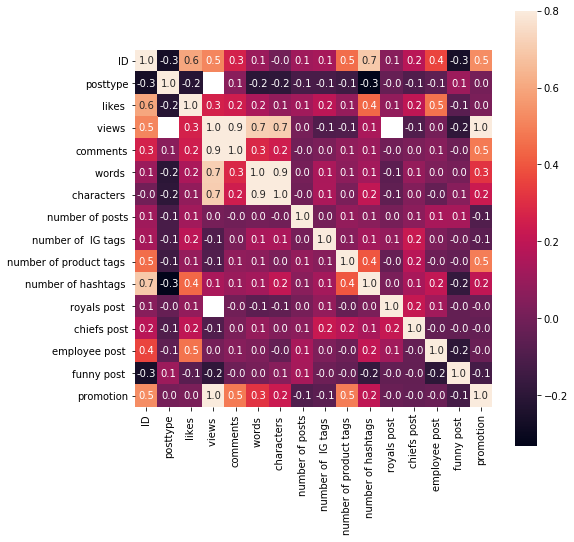

In [47]:

plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, fmt=".1f")

***Positive Relationships*** 

-Likes and employee posts 

-Likes and number of hashtags 

-Likes and views 

***There is a high correlation with the number of likes received and whehter the post is employee related or not. This means that posts that are about staff members tend to receive a higher number of likes.*** 

***There is also a high correlation with the number of likes received and the number of hashtags used when posting. This means that in theory if the number of hashtags are increaed, so will the number of likesd.*** 


***There is a moderate correlation with the number of likes received and the number of views. This means that posts with a higher number of views are likely to receive a higher number of likes.*** 

## Conclusion 

1. How many IG posts total? 

       269 Posts 

2. How many posts are photos vs. videos? 

       233 Photos, 36 Videos 

3. How do likes on posts fluctuate over time?

       Likes have been increasing over the years. Likes are higher in the beggining months of the year, and lower towards the end of the year. 

4. What are the average number of likes on photos? On videos? 

       36 likes (Photos), 23 likes (Videos)

5. Which is the top liked post on IG? 

       Post from Jan 23, 2020 -- Chiefs Bandana Post 

6. Which is the least liked post on IG? 

       Post from Dec 2, 2017 -- Open House Post 

7. Are there any correlations with higher liked posts?

       There is a positive correlation with number of likes and whether the post is about staff members. There is a positive correlation with number of likes and the number of hashtags used. There is a positive correlation with the number of likes and the number of views. 